In [1]:
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#Generate Data
X,y = datasets.make_moons(noise=0.2)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scale the data
scalerX = StandardScaler().fit(X)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
X_scaled = scalerX.transform(X)

In [87]:
clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
clf.fit(X_train_scaled, y_train)

SVC(C=5, coef0=1, kernel='poly')

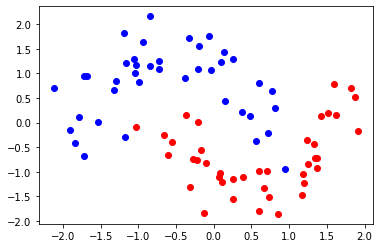

In [88]:
X0 = X_train_scaled[y_train==0]
X1 = X_train_scaled[y_train==1]

plt.plot(X0[:,0],X0[:,1],'bo')
plt.plot(X1[:,0],X1[:,1],'ro')

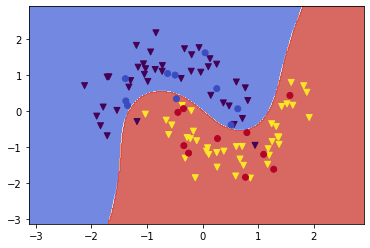

In [89]:
h = 0.02 #step size of mesh

# create meshgrid for plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#predict classes using classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# contour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='v')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, marker='o', cmap=plt.cm.coolwarm)

In [72]:
test = np.c_[xx.ravel(),yy.ravel()]
test.shape

(49780, 2)